In [14]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [15]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Create a set of random latitude and longitude combinations.zipping them as pairs with zip function
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
     # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | lompoc
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | calvia
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | berlin
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | hvammstangi
City not found. Skipping...
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | lavrentiya
Processing Record 13 of Set 1 | buluang
Processing Record 14 of Set 1 | fukue
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | concepcion del oro
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | valparaiso
Processing Record 19 of Set 1 | kapaa
Processing Record 20 of Set 1 | sao jose do belmonte
Processing Record 21 of Set 1 | tsihombe
City not found. Skip

Processing Record 35 of Set 4 | qasigiannguit
Processing Record 36 of Set 4 | changqing
Processing Record 37 of Set 4 | hovd
Processing Record 38 of Set 4 | caravelas
Processing Record 39 of Set 4 | georgetown
Processing Record 40 of Set 4 | kambove
Processing Record 41 of Set 4 | kaeo
Processing Record 42 of Set 4 | svetlogorsk
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | cururupu
Processing Record 45 of Set 4 | kutum
Processing Record 46 of Set 4 | ogaminana
Processing Record 47 of Set 4 | domokos
Processing Record 48 of Set 4 | newport
Processing Record 49 of Set 4 | port lincoln
Processing Record 50 of Set 4 | partizanskoye
Processing Record 1 of Set 5 | mehamn
Processing Record 2 of Set 5 | shingu
Processing Record 3 of Set 5 | sur
Processing Record 4 of Set 5 | saint anthony
Processing Record 5 of Set 5 | sao jose da coroa grande
Processing Record 6 of Set 5 | lobito
Processing Record 7 of Set 5 | bambous virieux
Processing Record 8 of Set 5 | victoria
Pr

Processing Record 22 of Set 8 | haukipudas
Processing Record 23 of Set 8 | abha
Processing Record 24 of Set 8 | saldanha
Processing Record 25 of Set 8 | neuquen
Processing Record 26 of Set 8 | quelimane
Processing Record 27 of Set 8 | ust-kulom
Processing Record 28 of Set 8 | price
Processing Record 29 of Set 8 | rajapur
Processing Record 30 of Set 8 | tucuman
Processing Record 31 of Set 8 | gizo
Processing Record 32 of Set 8 | fairbanks
Processing Record 33 of Set 8 | moncao
Processing Record 34 of Set 8 | asfi
Processing Record 35 of Set 8 | nieuw amsterdam
Processing Record 36 of Set 8 | fonte boa
Processing Record 37 of Set 8 | coos bay
Processing Record 38 of Set 8 | poya
Processing Record 39 of Set 8 | dunedin
Processing Record 40 of Set 8 | lingyuan
Processing Record 41 of Set 8 | kuandian
Processing Record 42 of Set 8 | yinchuan
Processing Record 43 of Set 8 | manjeri
Processing Record 44 of Set 8 | arlit
Processing Record 45 of Set 8 | nizhnevartovsk
Processing Record 46 of Se

Processing Record 17 of Set 12 | gushikawa
Processing Record 18 of Set 12 | pitimbu
Processing Record 19 of Set 12 | dingle
Processing Record 20 of Set 12 | ust-kuyga
Processing Record 21 of Set 12 | puerto escondido
Processing Record 22 of Set 12 | sotouboua
Processing Record 23 of Set 12 | laukaa
Processing Record 24 of Set 12 | seabra
Processing Record 25 of Set 12 | mastic beach
Processing Record 26 of Set 12 | tikrit
Processing Record 27 of Set 12 | oussouye
Processing Record 28 of Set 12 | sao felix do xingu
Processing Record 29 of Set 12 | seoul
Processing Record 30 of Set 12 | puertollano
Processing Record 31 of Set 12 | namibe
Processing Record 32 of Set 12 | qui nhon
Processing Record 33 of Set 12 | durango
Processing Record 34 of Set 12 | canavieiras
Processing Record 35 of Set 12 | bonfim
Processing Record 36 of Set 12 | mosquera
Processing Record 37 of Set 12 | beverley
Processing Record 38 of Set 12 | sobolevo
Processing Record 39 of Set 12 | samarai
Processing Record 40 

In [22]:
len(city_data)

554

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,75.25,78,40,17.27,CK,2021-07-13 13:25:03
1,Lompoc,34.6391,-120.4579,63.09,89,90,4.61,US,2021-07-13 13:25:03
2,Thompson,55.7435,-97.8558,57.36,77,20,8.05,CA,2021-07-13 13:25:03
3,Calvia,39.5657,2.5062,82.42,39,5,16.93,ES,2021-07-13 13:25:04
4,Ushuaia,-54.8000,-68.3000,35.26,80,75,11.50,AR,2021-07-13 13:21:35
...,...,...,...,...,...,...,...,...,...
549,Lac Du Bonnet,50.2536,-96.0612,63.75,89,9,6.73,CA,2021-07-13 13:27:43
550,Tanhacu,-14.0214,-41.2481,75.70,53,35,8.05,BR,2021-07-13 13:27:43
551,Inuvik,68.3499,-133.7218,63.46,66,40,3.44,CA,2021-07-13 13:27:43
552,Phangnga,8.4509,98.5298,85.91,87,99,3.36,TH,2021-07-13 13:27:44


In [24]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2021-07-13 13:25:03,-21.2078,-159.7750,75.25,78,40,17.27
1,Lompoc,US,2021-07-13 13:25:03,34.6391,-120.4579,63.09,89,90,4.61
2,Thompson,CA,2021-07-13 13:25:03,55.7435,-97.8558,57.36,77,20,8.05
3,Calvia,ES,2021-07-13 13:25:04,39.5657,2.5062,82.42,39,5,16.93
4,Ushuaia,AR,2021-07-13 13:21:35,-54.8000,-68.3000,35.26,80,75,11.50
...,...,...,...,...,...,...,...,...,...
549,Lac Du Bonnet,CA,2021-07-13 13:27:43,50.2536,-96.0612,63.75,89,9,6.73
550,Tanhacu,BR,2021-07-13 13:27:43,-14.0214,-41.2481,75.70,53,35,8.05
551,Inuvik,CA,2021-07-13 13:27:43,68.3499,-133.7218,63.46,66,40,3.44
552,Phangnga,TH,2021-07-13 13:27:44,8.4509,98.5298,85.91,87,99,3.36


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

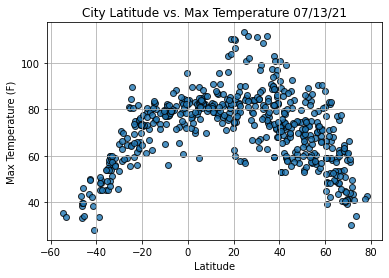

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

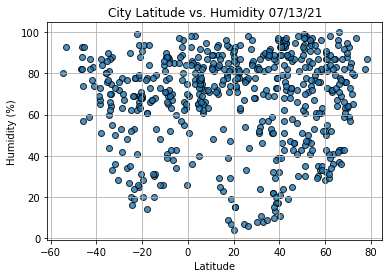

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

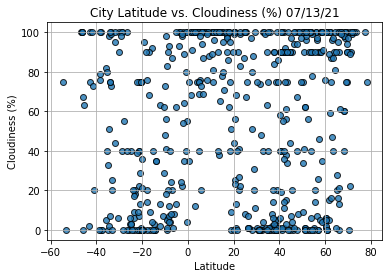

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

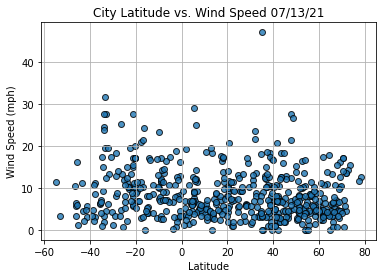

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [50]:
index13 = city_data_df.loc[13]
index13

City           Concepcion Del Oro
Country                        MX
Date          2021-07-13 13:25:07
Lat                       24.6333
Lng                     -101.4167
Max Temp                     57.6
Humidity                       67
Cloudiness                     87
Wind Speed                   5.41
Name: 13, dtype: object

In [51]:
#  get all Northern Hemisphere latitudes,
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
549     True
550    False
551     True
552     True
553     True
Name: Lat, Length: 554, dtype: bool

In [54]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Lompoc,US,2021-07-13 13:25:03,34.6391,-120.4579,63.09,89,90,4.61
2,Thompson,CA,2021-07-13 13:25:03,55.7435,-97.8558,57.36,77,20,8.05
3,Calvia,ES,2021-07-13 13:25:04,39.5657,2.5062,82.42,39,5,16.93
5,Berlin,DE,2021-07-13 13:21:00,52.5244,13.4105,89.15,47,0,10.00
6,Albany,US,2021-07-13 13:25:04,42.6001,-73.9662,71.38,93,92,1.99
...,...,...,...,...,...,...,...,...,...
548,Buchanan,LR,2021-07-13 13:27:42,5.8808,-10.0467,84.16,78,73,12.24
549,Lac Du Bonnet,CA,2021-07-13 13:27:43,50.2536,-96.0612,63.75,89,9,6.73
551,Inuvik,CA,2021-07-13 13:27:43,68.3499,-133.7218,63.46,66,40,3.44
552,Phangnga,TH,2021-07-13 13:27:44,8.4509,98.5298,85.91,87,99,3.36


In [55]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

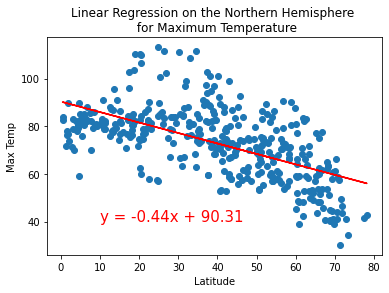

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))

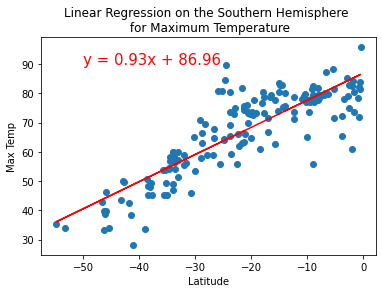

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

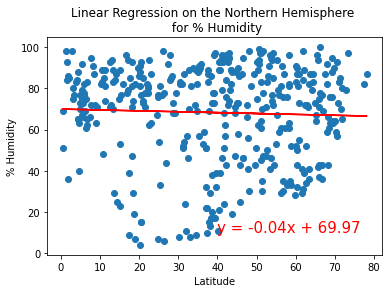

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

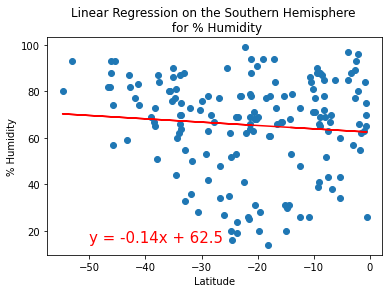

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

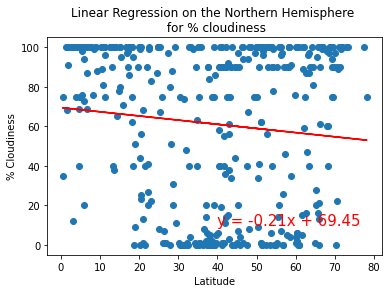

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % cloudiness', '% Cloudiness',(40,10))

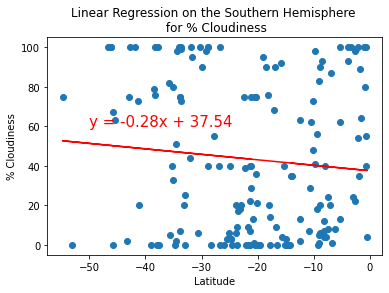

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

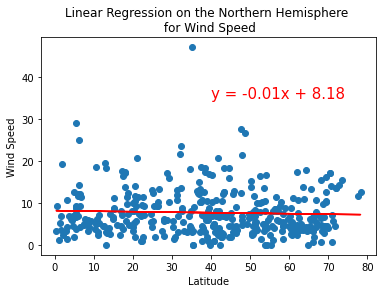

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

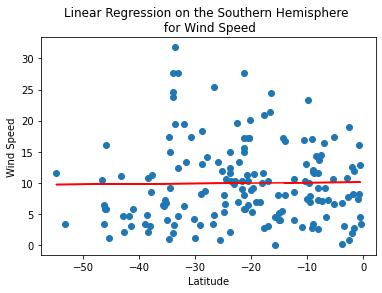

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))